In [1]:
#pip install tkinter

ERROR: Could not find a version that satisfies the requirement tkinter (from versions: none)
ERROR: No matching distribution found for tkinter

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\risse\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# GRAFICA PARA LA VIABILIDAD DE PROYECTOS DE INVERSION 

### VENTANA PARA 1 PROYECTO DE INVERSION

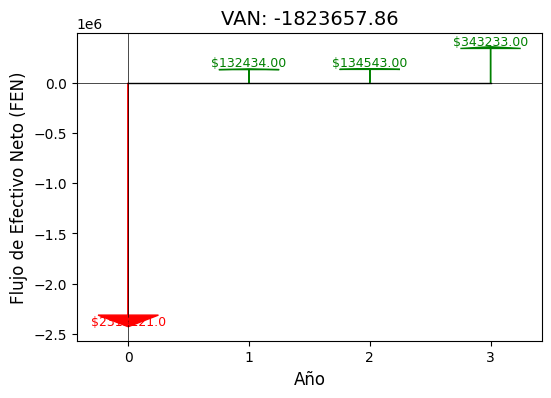

In [6]:
import tkinter as tk
from tkinter import messagebox, ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def calcular_van():
    try:
        inversion = float(entry_inversion.get())
        interes = float(entry_interes.get()) / 100
        tiempo = int(entry_tiempo.get())
        
        fen = []
        for i in range(tiempo):
            fen.append(float(entries_fen[i].get()))
        
        van = -inversion
        for t in range(1, tiempo + 1):
            van += fen[t-1] / (1 + interes)**t
        
        mostrar_resultado(inversion, interes, tiempo, fen, van)
    except ValueError:
        messagebox.showerror("!ERROR", "Ingrese valores validos.")





def mostrar_resultado(inversion, interes, tiempo, fen, van):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot([0, tiempo], [0, 0], color='black', lw=1)
    ax.arrow(0, 0, 0, -inversion, head_width=0.5, head_length=0.05 * inversion, fc='red', ec='red')
    ax.text(0, -inversion, f'${inversion}', ha='center', va='top', fontsize=9, color='red')
    
    for t in range(1, tiempo + 1):
        if fen[t-1] > 0:
            ax.arrow(t, 0, 0, fen[t-1], head_width=0.5, head_length=0.05 * fen[t-1], fc='green', ec='green')
            ax.text(t, fen[t-1], f'${fen[t-1]:.2f}', ha='center', va='bottom', fontsize=9, color='green')
        else:
            ax.arrow(t, 0, 0, fen[t-1], head_width=0.5, head_length=0.05 * abs(fen[t-1]), fc='blue', ec='blue')
            ax.text(t, fen[t-1], f'${fen[t-1]:.2f}', ha='center', va='top', fontsize=9, color='blue')
    
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_xticks(range(tiempo + 1))
    ax.set_xlabel('Año', fontsize=12)
    ax.set_ylabel('Flujo de Efectivo Neto (FEN)', fontsize=12)
    ax.set_title(f'VAN: {van:.2f}', fontsize=14)
    
    canvas = FigureCanvasTkAgg(fig, master=frame_resultado)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
    
    recomendacion = "RECOMENDACION: "
    if van > 0:
        recomendacion += "El proyecto es rentable. Se recomienda invertir."
    elif van < 0:
        recomendacion += "El proyecto no es rentable. No se recomienda invertir."
    else:
        recomendacion += "El proyecto es neutral. Puede considerarse invertir si hay otros beneficios."

    lbl_recomendacion.config(text=recomendacion)

def crear_entries_fen():
    for widget in frame_fen.winfo_children():
        widget.destroy()
    
    tiempo = int(entry_tiempo.get())
    global entries_fen
    entries_fen = []
    for t in range(tiempo):
        tk.Label(frame_fen, text=f"FEN año {t+1}:", bg='#f0f0f0', font=('Arial', 12)).grid(row=t, column=0, pady=5, padx=5, sticky='e')
        entry = tk.Entry(frame_fen, font=('Arial', 12))
        entry.grid(row=t, column=1, pady=5, padx=5)
        entries_fen.append(entry)

root = tk.Tk()
root.title("Calculo del VAN")
root.configure(bg='#f0f0f0')

canvas_root = tk.Canvas(root)
scrollbar_root = ttk.Scrollbar(root, orient="vertical", command=canvas_root.yview)
scrollable_frame_root = ttk.Frame(canvas_root)

scrollable_frame_root.bind(
    "<Configure>",
    lambda e: canvas_root.configure(
        scrollregion=canvas_root.bbox("all")
    )
)

canvas_root.create_window((0, 0), window=scrollable_frame_root, anchor="nw")
canvas_root.configure(yscrollcommand=scrollbar_root.set)

tk.Label(scrollable_frame_root, text="Inversión inicial:", bg='#f0f0f0', font=('Arial', 12)).grid(row=0, column=0, pady=10, padx=10, sticky='e')
entry_inversion = tk.Entry(scrollable_frame_root, font=('Arial', 12))
entry_inversion.grid(row=0, column=1, pady=10, padx=10)

tk.Label(scrollable_frame_root, text="Interés (%):", bg='#f0f0f0', font=('Arial', 12)).grid(row=1, column=0, pady=10, padx=10, sticky='e')
entry_interes = tk.Entry(scrollable_frame_root, font=('Arial', 12))
entry_interes.grid(row=1, column=1, pady=10, padx=10)

tk.Label(scrollable_frame_root, text="Tiempo (años):", bg='#f0f0f0', font=('Arial', 12)).grid(row=2, column=0, pady=10, padx=10, sticky='e')
entry_tiempo = tk.Entry(scrollable_frame_root, font=('Arial', 12))
entry_tiempo.grid(row=2, column=1, pady=10, padx=10)

tk.Button(scrollable_frame_root, text="Crear campos FEN", command=crear_entries_fen, font=('Arial', 12), bg='#4CAF50', fg='white').grid(row=3, column=0, columnspan=2, pady=10, padx=10)

frame_fen = tk.Frame(scrollable_frame_root, bg='#f0f0f0')
frame_fen.grid(row=4, column=0, columnspan=2, sticky='nsew')

tk.Button(scrollable_frame_root, text="Calcular VAN", command=calcular_van, font=('Arial', 12), bg='#008CBA', fg='white').grid(row=5, column=0, columnspan=2, pady=20, padx=10)

frame_resultado = tk.Frame(scrollable_frame_root, bg='#f0f0f0')
frame_resultado.grid(row=6, column=0, columnspan=2, sticky='nsew')

lbl_recomendacion = tk.Label(scrollable_frame_root, text="", bg='#f0f0f0', font=('Arial', 12), justify='left')
lbl_recomendacion.grid(row=7, column=0, columnspan=2, pady=10, padx=10, sticky='w')

canvas_root.pack(side="left", fill="both", expand=True)
scrollbar_root.pack(side="right", fill="y")

root.mainloop()


### VENTANA PARA MÁS DE 1 PROYECTO DE INVERSION - COMPARACION DE PROYECTOS

In [10]:
import tkinter as tk
from tkinter import messagebox, ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class VanCalculatorApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Cálculo del VAN")
        self.root.geometry("800x600")
        self.root.configure(bg='#f0f0f0')

        self.create_initial_interface()

    def create_initial_interface(self):
        self.main_canvas = tk.Canvas(self.root, bg='#f0f0f0')
        self.main_scrollbar_y = ttk.Scrollbar(self.root, orient="vertical", command=self.main_canvas.yview)
        self.main_scrollbar_x = ttk.Scrollbar(self.root, orient="horizontal", command=self.main_canvas.xview)
        self.scrollable_main_frame = ttk.Frame(self.main_canvas)

        self.scrollable_main_frame.bind(
            "<Configure>",
            lambda e: self.main_canvas.configure(
                scrollregion=self.main_canvas.bbox("all")
            )
        )

        self.main_canvas.create_window((0, 0), window=self.scrollable_main_frame, anchor="nw")
        self.main_canvas.configure(yscrollcommand=self.main_scrollbar_y.set, xscrollcommand=self.main_scrollbar_x.set)

        self.main_canvas.pack(side="left", fill="both", expand=True)
        self.main_scrollbar_y.pack(side="right", fill="y")
        self.main_scrollbar_x.pack(side="bottom", fill="x")

        tk.Label(self.scrollable_main_frame, text="Número de proyectos:", bg='#f0f0f0', font=('Arial', 12)).grid(row=0, column=0, pady=10, padx=10, sticky='e')
        self.entry_num_projects = tk.Entry(self.scrollable_main_frame, font=('Arial', 12))
        self.entry_num_projects.grid(row=0, column=1, pady=10, padx=10)

        tk.Button(self.scrollable_main_frame, text="Continuar", command=self.setup_projects_interface, font=('Arial', 12), bg='#4CAF50', fg='white').grid(row=1, column=0, columnspan=2, pady=10, padx=10)

    def setup_projects_interface(self):
        try:
            num_projects = int(self.entry_num_projects.get())
            if num_projects < 1 or num_projects > 3:
                raise ValueError

            for widget in self.scrollable_main_frame.winfo_children():
                widget.destroy()

            self.projects = []
            self.frames = []
            for i in range(num_projects):
                frame = tk.Frame(self.scrollable_main_frame, bg='#f0f0f0', borderwidth=2, relief="groove")
                frame.grid(row=0, column=i, sticky='nsew', padx=5, pady=5)
                self.frames.append(frame)
                project = ProjectFrame(frame, i + 1)
                self.projects.append(project)

            tk.Button(self.scrollable_main_frame, text="Calcular VAN", command=self.calculate_van, font=('Arial', 12), bg='#008CBA', fg='white').grid(row=1, column=0, columnspan=num_projects, pady=20, padx=10)

            self.scrollable_main_frame.update_idletasks()
            self.main_canvas.config(scrollregion=self.main_canvas.bbox("all"))

        except ValueError:
            messagebox.showerror("Error", "Por favor ingrese un número válido de proyectos (1-3).")

    def calculate_van(self):
        results = []
        for project in self.projects:
            van, fen, tiempo, interes, inversion = project.calculate_van()
            results.append((van, fen, tiempo, interes, inversion))

        self.show_results(results)

    def show_results(self, results):
        for widget in self.scrollable_main_frame.winfo_children():
            widget.destroy()

        fig, ax = plt.subplots(figsize=(12, 6))

        for i, (van, fen, tiempo, interes, inversion) in enumerate(results):
            color = ['blue', 'green', 'red'][i]
            label = f'Proyecto {i + 1}'
            ax.plot([0, tiempo], [0, 0], color='black', lw=1)
            ax.arrow(0, 0, 0, -inversion, head_width=0.5, head_length=0.05 * inversion, fc=color, ec=color, label=label)
            ax.text(0, -inversion, f'${inversion}', ha='center', va='top', fontsize=9, color=color)

            for t in range(1, tiempo + 1):
                if fen[t-1] > 0:
                    ax.arrow(t, 0, 0, fen[t-1], head_width=0.5, head_length=0.05 * fen[t-1], fc=color, ec=color)
                    ax.text(t, fen[t-1], f'${fen[t-1]:.2f}', ha='center', va='bottom', fontsize=9, color=color)
                else:
                    ax.arrow(t, 0, 0, fen[t-1], head_width=0.5, head_length=0.05 * abs(fen[t-1]), fc=color, ec=color)
                    ax.text(t, fen[t-1], f'${fen[t-1]:.2f}', ha='center', va='top', fontsize=9, color=color)
        
            ax.axhline(0, color='black', linewidth=0.5)
            ax.axvline(0, color='black', linewidth=0.5)
            ax.set_xticks(range(tiempo + 1))
            ax.set_xlabel('Año', fontsize=12)
            ax.set_ylabel('Flujo de Efectivo Neto (FEN)', fontsize=12)
            ax.set_title(f'Comparación de Proyectos', fontsize=14)
            ax.legend()

        canvas = FigureCanvasTkAgg(fig, master=self.scrollable_main_frame)
        canvas.draw()
        canvas.get_tk_widget().grid(row=0, column=0, columnspan=3, padx=10, pady=10)

        for i, (van, fen, tiempo, interes, inversion) in enumerate(results):
            recommendation = "Recomendación: "
            if van > 0:
                recommendation += f"El proyecto {i + 1} es rentable. Se recomienda invertir."
            elif van < 0:
                recommendation += f"El proyecto {i + 1} no es rentable. No se recomienda invertir."
            else:
                recommendation += f"El proyecto {i + 1} es neutral. Puede considerarse invertir si hay otros beneficios."

            lbl_recommendation = tk.Label(self.scrollable_main_frame, text=recommendation, bg='#f0f0f0', font=('Arial', 12), justify='left')
            lbl_recommendation.grid(row=i + 1, column=0, columnspan=3, pady=10, padx=10)

class ProjectFrame:
    def __init__(self, root, project_number):
        self.root = root
        self.project_number = project_number

        tk.Label(root, text=f"Proyecto {project_number}", bg='#f0f0f0', font=('Arial', 14, 'bold')).grid(row=0, column=0, columnspan=2, pady=10)
        
        tk.Label(root, text="Inversión inicial:", bg='#f0f0f0', font=('Arial', 12)).grid(row=1, column=0, pady=10, padx=10, sticky='e')
        self.entry_inversion = tk.Entry(root, font=('Arial', 12))
        self.entry_inversion.grid(row=1, column=1, pady=10, padx=10)

        tk.Label(root, text="Interés (%):", bg='#f0f0f0', font=('Arial', 12)).grid(row=2, column=0, pady=10, padx=10, sticky='e')
        self.entry_interes = tk.Entry(root, font=('Arial', 12))
        self.entry_interes.grid(row=2, column=1, pady=10, padx=10)

        tk.Label(root, text="Tiempo (años):", bg='#f0f0f0', font=('Arial', 12)).grid(row=3, column=0, pady=10, padx=10, sticky='e')
        self.entry_tiempo = tk.Entry(root, font=('Arial', 12))
        self.entry_tiempo.grid(row=3, column=1, pady=10, padx=10)

        tk.Button(root, text="Crear campos FEN", command=self.crear_entries_fen, font=('Arial', 12), bg='#4CAF50', fg='white').grid(row=4, column=0, columnspan=2, pady=10, padx=10)

        self.frame_fen = tk.Frame(root, bg='#f0f0f0')
        self.frame_fen.grid(row=5, column=0, columnspan=2, sticky='nsew')

        self.canvas_fen = tk.Canvas(self.frame_fen, bg='#f0f0f0')
        self.scrollbar_fen_y = ttk.Scrollbar(self.frame_fen, orient="vertical", command=self.canvas_fen.yview)
        self.scrollbar_fen_x = ttk.Scrollbar(self.frame_fen, orient="horizontal", command=self.canvas_fen.xview)
        self.scrollable_frame_fen = ttk.Frame(self.canvas_fen)

        self.scrollable_frame_fen.bind(
            "<Configure>",
            lambda e: self.canvas_fen.configure(
                scrollregion=self.canvas_fen.bbox("all")
            )
        )

        self.canvas_fen.create_window((0, 0), window=self.scrollable_frame_fen, anchor="nw")
        self.canvas_fen.configure(yscrollcommand=self.scrollbar_fen_y.set, xscrollcommand=self.scrollbar_fen_x.set)

        self.canvas_fen.pack(side="left", fill="both", expand=True)
        self.scrollbar_fen_y.pack(side="right", fill="y")
        self.scrollbar_fen_x.pack(side="bottom", fill="x")

    def crear_entries_fen(self):
        for widget in self.scrollable_frame_fen.winfo_children():
            widget.destroy()
        
        tiempo = int(self.entry_tiempo.get())
        self.entries_fen = []
        for t in range(tiempo):
            tk.Label(self.scrollable_frame_fen, text=f"FEN año {t+1}:", bg='#f0f0f0', font=('Arial', 12)).grid(row=t, column=0, pady=5, padx=5, sticky='e')
            entry = tk.Entry(self.scrollable_frame_fen, font=('Arial', 12))
            entry.grid(row=t, column=1, pady=5, padx=5)
            self.entries_fen.append(entry)

    def calculate_van(self):
        try:
            inversion = float(self.entry_inversion.get())
            interes = float(self.entry_interes.get()) / 100
            tiempo = int(self.entry_tiempo.get())
            
            fen = []
            for i in range(tiempo):
                fen.append(float(self.entries_fen[i].get()))
            
            van = -inversion
            for t in range(1, tiempo + 1):
                van += fen[t-1] / (1 + interes)**t
            
            return van, fen, tiempo, interes, inversion
        except ValueError:
            messagebox.showerror("Error", "Por favor ingrese valores válidos.")

if __name__ == "__main__":
    root = tk.Tk()
    app = VanCalculatorApp(root)
    root.mainloop()


In [13]:
##############################

# GRAFICO DEL VAN

### Creacion del calculo del VAN o VPN, a traves de datos un gran tamaño de volumen de FLUJO EFECTIVO NETO (FEN)

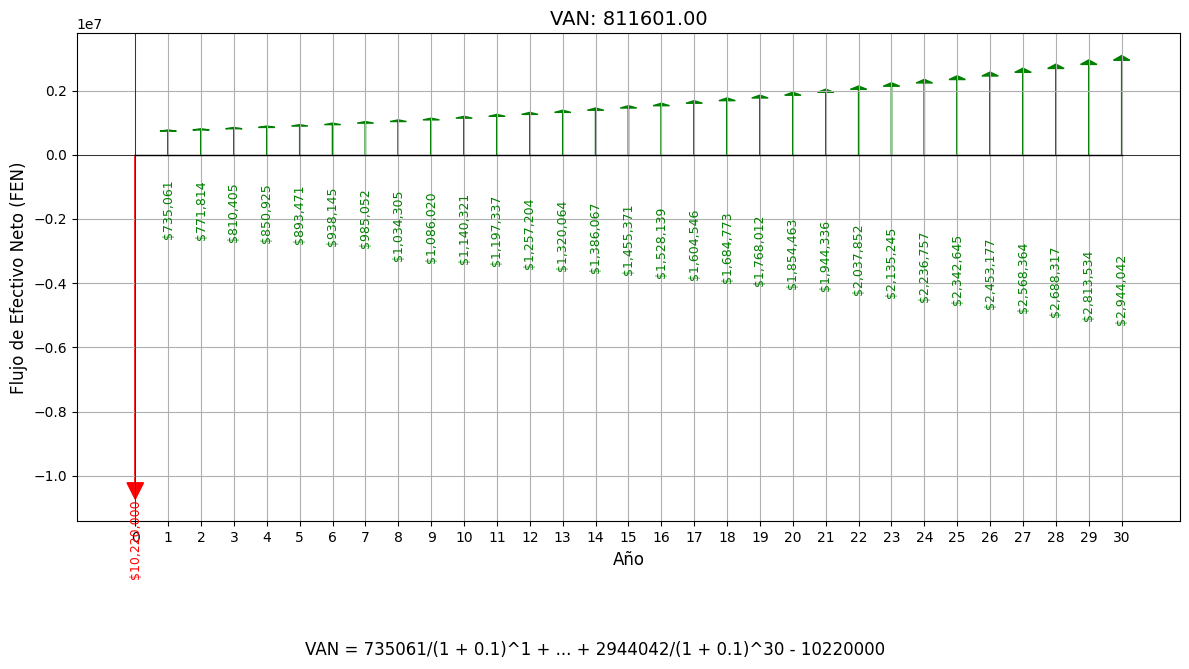

In [2]:
import matplotlib.pyplot as plt


inversion = 10220000
interes = 0.10
n = 30
fen = [
    735061, 771814, 810405, 850925, 893471, 938145, 985052, 1034305, 1086020,
    1140321, 1197337, 1257204, 1320064, 1386067, 1455371, 1528139, 1604546,
    1684773, 1768012, 1854463, 1944336, 2037852, 2135245, 2236757, 2342645,
    2453177, 2568364, 2688317, 2813534, 2944042
]





van = -inversion
for t in range(1, n + 1):
    van += fen[t-1] / (1 + interes)**t






fig, ax = plt.subplots(figsize=(12, 6))
ax.plot([0, n], [0, 0], color='black', lw=1)
ax.arrow(0, 0, 0, -inversion, head_width=0.5, head_length=0.05 * inversion, fc='red', ec='red')
ax.text(0, -inversion * 1.05, f'${inversion:,}', ha='center', va='top', fontsize=9, color='red', rotation=90)

for t in range(1, n + 1):
    if fen[t-1] > 0:
        ax.arrow(t, 0, 0, fen[t-1], head_width=0.5, head_length=0.05 * fen[t-1], fc='green', ec='green')
        ax.text(t, -fen[t-1] * 1.05, f'${fen[t-1]:,.0f}', ha='center', va='top', fontsize=9, color='green', rotation=90)
    else:
        ax.arrow(t, 0, 0, fen[t-1], head_width=0.5, head_length=0.05 * abs(fen[t-1]), fc='blue', ec='blue')
        ax.text(t, -fen[t-1] * 1.05, f'${fen[t-1]:,.0f}', ha='center', va='top', fontsize=9, color='blue', rotation=90)






ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_xticks(range(n + 1))
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Flujo de Efectivo Neto (FEN)', fontsize=12)
ax.set_title(f'VAN: {van:.2f}', fontsize=14)





formula_desarrollada = f"VAN = {fen[0]}/(1 + {interes})^1 + ... + {fen[-1]}/(1 + {interes})^{n} - {inversion}"
plt.figtext(0.5, -0.1, formula_desarrollada, wrap=True, horizontalalignment='center', fontsize=12)

plt.grid(True)
plt.tight_layout()
plt.show()
